<a href="https://colab.research.google.com/github/TheoKoess/Financement/blob/pierre-vdb/PROFound.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projet : fiancement_df de projet

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt # plotting & dataviz

# Ceci est un test
# Ceci est le test deucième du nom 

In [5]:
fiancement_df = pd.read_csv("/content/drive/MyDrive/fiancement_df.csv", sep=",", header = 0)
fiancement_df.drop("Unnamed: 0", axis= 1, inplace=True)

In [6]:
def resume_table(df):
    print("Format de la base : {}".format(df.shape))
    summary = pd.DataFrame(df.dtypes, columns=["dtypes"]).reset_index()
    summary["name"] = summary["index"]
    summary = summary[["name", "dtypes"]] # Correction : les colonnes doivent être spécifiées entre crochets
    summary["Missing"] = df.isnull().sum().values
    summary["Miss_percent"] = round((summary["Missing"] / len(df))*100, 2) # Correction : le calcul du pourcentage de valeurs manquantes doit être corrigé
    summary["Uniques"] = df.nunique().values
    summary["First Value"] = df.iloc[0].values
    summary["Second value"] = df.iloc[1].values
    summary["Third value"] = df.iloc[2].values
    return summary

In [7]:
fiancement_df = fiancement_df.dropna()

## Préparation des données



Séparation des variables de type date 'lancement' et 'date_butoire' en jour mois année
ajout d'une nouvelle variable 'écart_date' qui calcule l'écart en jours entre 'lancement' et 'date_butoire'

In [8]:
# Conversion de la variable 'lancement' en type datetime puis on garde juste la date
fiancement_df["lancement"] = pd.to_datetime(fiancement_df["lancement"])

# Conversion de la variable 'date_butoire' en date
fiancement_df["date_butoire"] = pd.to_datetime(fiancement_df["date_butoire"])

In [9]:
fiancement_df["day_lancement"] = fiancement_df["lancement"].dt.day.astype(int)
fiancement_df["month_lancement"] = fiancement_df["lancement"].dt.month.astype(int)
fiancement_df["year_lancement"] = fiancement_df["lancement"].dt.year.astype(int)

fiancement_df["day_date_butoire"] = fiancement_df["date_butoire"].dt.day.astype(int)
fiancement_df["month_date_butoire"] = fiancement_df["date_butoire"].dt.month.astype(int)
fiancement_df["year_date_butoire"] = fiancement_df["date_butoire"].dt.year.astype(int)

fiancement_df['ecart'] = (fiancement_df['date_butoire'] - fiancement_df['lancement']) / np.timedelta64(1, 'D')

In [ ]:
fiancement_df

In [ ]:
resume_table(fiancement_df)

# Feature engineering

In [10]:
fiancement_df['etat'] = fiancement_df['etat'].replace("successful",1)
fiancement_df['etat'] = fiancement_df['etat'].replace("live",1)
fiancement_df['etat'] = fiancement_df['etat'].replace("failed",0)
fiancement_df['etat'] = fiancement_df['etat'].replace("canceled",0)
fiancement_df['etat'] = fiancement_df['etat'].replace("suspended",0)
fiancement_df['etat'] = fiancement_df['etat'].astype(int)
fiancement_df

,ID,nom,categorie,categorie_principale,monaie,date_butoire,objectif,lancement,promesse,etat,...,promesse_usd1,promesse_usd2,objectif_usd,day_lancement,month_lancement,year_lancement,day_date_butoire,month_date_butoire,year_date_butoire,ecart
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,0,...,0.0,0.0,1533.95,11,8,2015,9,10,2015,58.491343
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,0,...,100.0,2421.0,30000.00,2,9,2017,1,11,2017,59.802813
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,0,...,220.0,220.0,45000.00,12,1,2013,26,2,2013,44.985532
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,0,...,1.0,1.0,5000.00,17,3,2012,16,4,2012,29.858206
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,0,...,1283.0,1283.0,19500.00,4,7,2015,29,8,2015,55.642326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378656,999976400,ChknTruk Nationwide Charity Drive 2014 (Canceled),Documentary,Film & Video,USD,2014-10-17,50000.0,2014-09-17 02:35:30,25.0,0,...,25.0,25.0,50000.00,17,9,2014,17,10,2014,29.892014
378657,999977640,The Tribe,Narrative Film,Film & Video,USD,2011-07-19,1500.0,2011-06-22 03:35:14,155.0,0,...,155.0,155.0,1500.00,22,6,2011,19,7,2011,26.850532
378658,999986353,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,USD,2010-08-16,15000.0,2010-07-01 19:40:30,20.0,0,...,20.0,20.0,15000.00,1,7,2010,16,8,2010,45.180208
378659,999987933,BioDefense Education Kit,Technology,Technology,USD,2016-02-13,15000.0,2016-01-13 18:13:53,200.0,0,...,200.0,200.0,15000.00,13,1,2016,13,2,2016,30.240359


<ipython-input-14-0e659ea78e07>:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  financement_year = financement2.groupby(by = 'year_lancement', as_index = False).sum()
<ipython-input-14-0e659ea78e07>:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  financement_month = financement2.groupby(by = 'month_lancement', as_index = False).mean()
<ipython-input-14-0e659ea78e07>:12: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
 

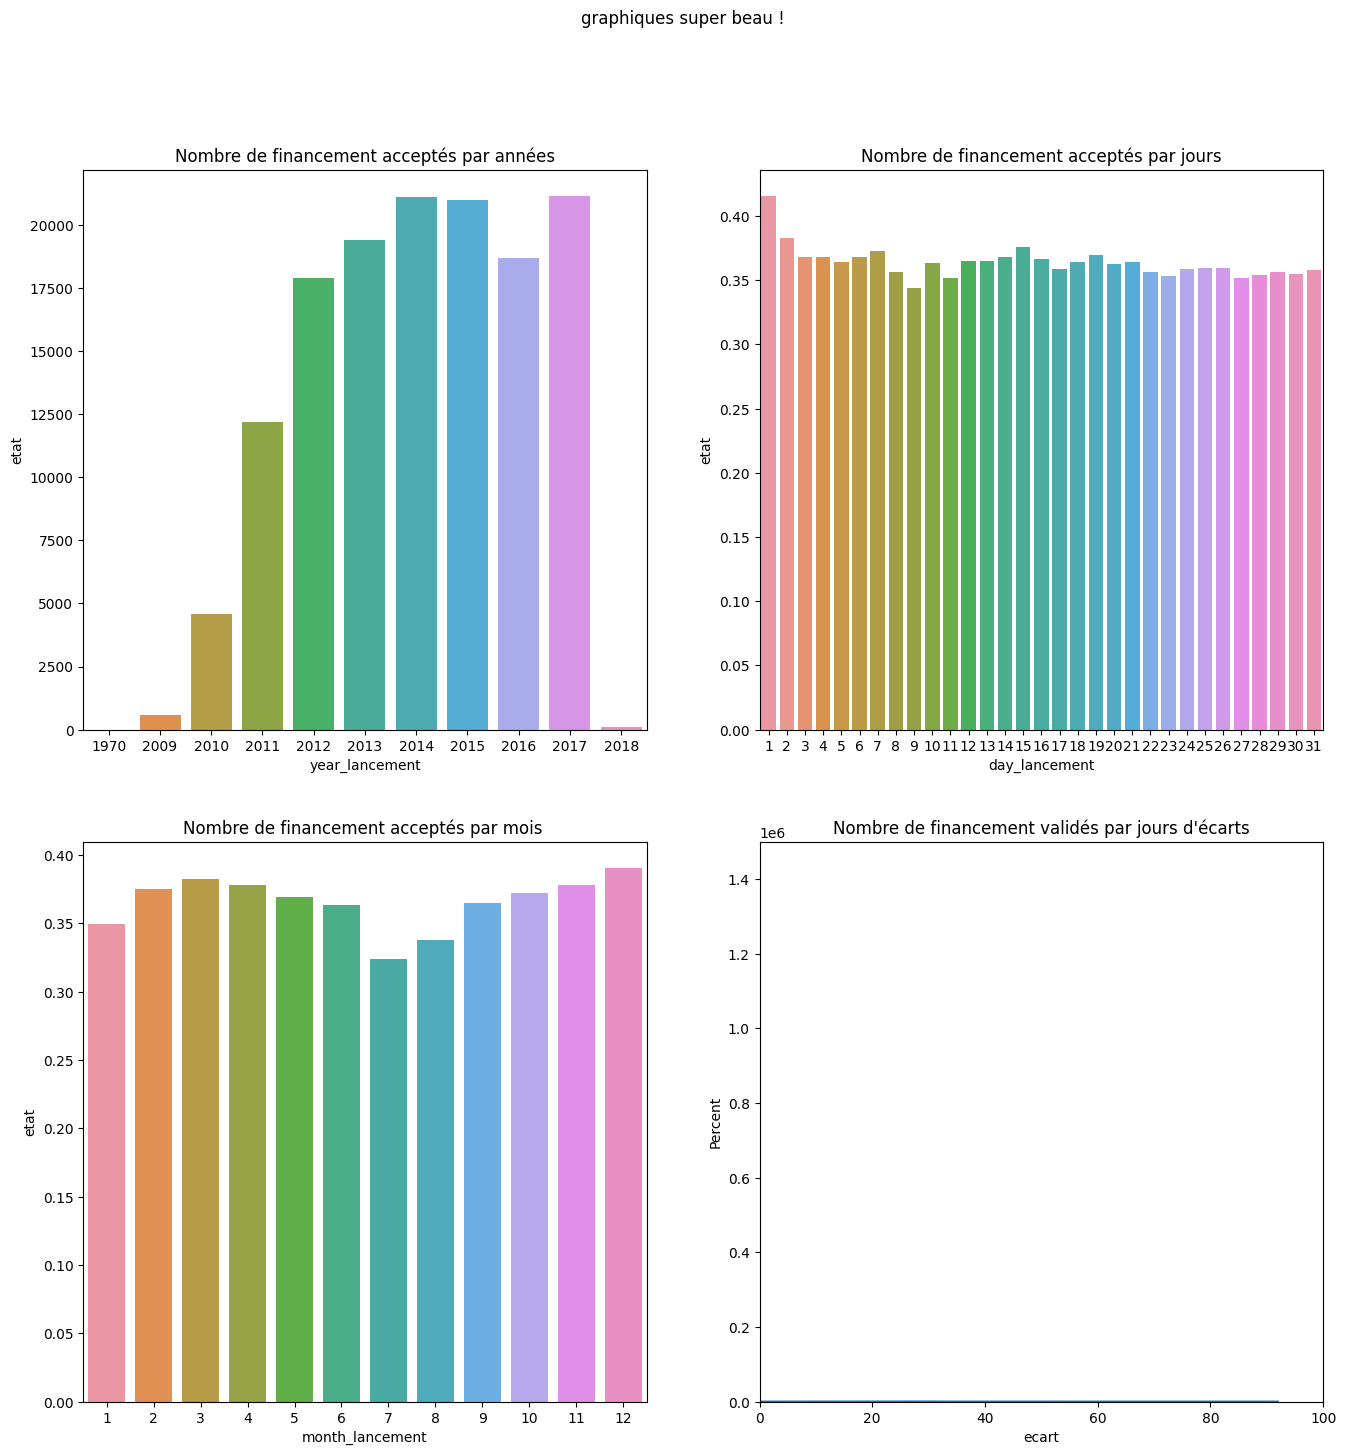

In [14]:
fiancement_df2 = fiancement_df.copy()
fiancement_df2['etat'] = fiancement_df['etat'].replace("successful",1)
fiancement_df2['etat'] = fiancement_df['etat'].replace("live",1)
fiancement_df2['etat'] = fiancement_df['etat'].replace("failed",0)
fiancement_df2['etat'] = fiancement_df['etat'].replace("canceled",0)
fiancement_df2['etat'] = fiancement_df['etat'].replace("suspended",0)
fiancement_df2['etat'] = fiancement_df['etat'].astype(int)
fiancement_df3 = fiancement_df2[fiancement_df2['ecart'] < 3000]

fiancement_df_year = fiancement_df2.groupby(by = 'year_lancement', as_index = False).sum()
fiancement_df_month = fiancement_df2.groupby(by = 'month_lancement', as_index = False).mean()
fiancement_df_day = fiancement_df2.groupby(by = 'day_lancement', as_index = False).mean()

fig, axes = plt.subplots(2, 2, figsize=(16,16))
fig.suptitle('graphiques super beau !')

# graph 1
sns.barplot(data = fiancement_df_year, y = 'etat', x = 'year_lancement', ax=axes[0,0])
axes[0,0].set_title('Nombre de fiancement_df acceptés par années')

# graph 2
sns.barplot(data = fiancement_df_month, y = 'etat', x='month_lancement', ax=axes[1,0] )
axes[1, 0].set_title('Nombre de fiancement_df acceptés par mois ')

# graph 3
sns.barplot(data = fiancement_df_day, y = 'etat', x='day_lancement', ax=axes[0,1] )
axes[0, 1].set_title('Nombre de fiancement_df acceptés par jours')

# graph montant moyen des taxes
sns.histplot(data = fiancement_df3, x='ecart', kde=True, stat="percent", ax=axes[1, 1])
axes[1, 1].set_title("Nombre de fiancement_df validés par jours d'écarts");

In [ ]:
fiancement_df2['ecart'].sort_values(ascending=False)

74196     91.962650
200310    91.934167
305126    91.891678
206611    91.825127
135100    91.791632
            ...    
370904     0.093831
65731      0.075463
182763     0.071493
180186     0.035498
156430     0.005058
Name: ecart, Length: 374853, dtype: float64

On cherche à prédire la variable Etat
On remarque que le la variable 'promesse_usd1' a 3797 NaN. Ces valeurs sont choisies comme données de train pour le futur modèle





Pour commencer, créer un dataframe contenant les variables quantitatives
On va faire des dummies dee variables 'categorie', 'categorie_principale', 'monnaie' et 'pays'

In [ ]:
fiancement_df_dum = pd.get_dummies(fiancement_df, columns=['categorie_principale', 'monaie', 'pays'])
fiancement_df_quant = fiancement_df.select_dtypes(include=['float64'])

col_fiancement_df = list(fiancement_df.columns)
remove_col = ['categorie_principale', 'monaie', 'pays']
list_col_to_remove = [x for x in col_fiancement_df if x not in remove_col]
fiancement_df_dum = fiancement_df_dum.drop(list_col_to_remove, axis= 1)

data = pd.concat([fiancement_df_dum, fiancement_df_quant], axis = 1)

In [ ]:
from sklearn.model_selection import train_test_split

target = fiancement_df['etat']

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

# Filtration

In [ ]:
from sklearn.feature_selection import VarianceThreshold
import matplotlib.pyplot as plt

sel = VarianceThreshold(threshold=1e-6)
sel.fit(X_train)
mask = sel.get_support()

plt.matshow(mask.reshape(1,-1), cmap = 'gray_r')
plt.xlabel('Feature selection')
plt.yticks([]);

In [ ]:
fiancement_df["date"]